In [1]:
import pandas as pd
import numpy as np

df_X = pd.read_csv('matminer_feature.csv')
df_X = df_X.drop(['Unnamed: 0'],axis=1)
x = df_X.values

from sklearn.impute import SimpleImputer

X =  SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(x)

df_y = pd.read_csv('y.csv')
df_y = df_y.drop(['Unnamed: 0'],axis=1)
y = df_y.values

X.shape,y.shape

((3017, 15), (3017, 1))

In [2]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [4]:
from sklearn import metrics

In [5]:
from sklearn.linear_model import LogisticRegression
    
lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)

y_predprob_lg = lg.predict_proba(X_test)[:,1]

fpr_lg,tpr_lg,threshold_lg=metrics.roc_curve(y_test,y_predprob_lg)
roc_auc_lg=metrics.auc(fpr_lg,tpr_lg)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0)
mnb.fit(X_train,y_train)

y_predprob_mnb = mnb.predict_proba(X_test)[:,1]

fpr_mnb,tpr_mnb,threshold_mnb=metrics.roc_curve(y_test,y_predprob_mnb)
roc_auc_mnb=metrics.auc(fpr_mnb,tpr_mnb)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [9]:
from sklearn import tree

dt= tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=6,min_samples_split=9)
dt.fit(X_train,y_train)

y_predprob_dt = dt.predict_proba(X_test)[:,1]

fpr_dt,tpr_dt,threshold_dt=metrics.roc_curve(y_test,y_predprob_dt)
roc_auc_dt=metrics.auc(fpr_dt,tpr_dt)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

y_predprob_knn = knn.predict_proba(X_test)[:,1]

fpr_knn,tpr_knn,threshold_knn=metrics.roc_curve(y_test,y_predprob_knn)
roc_auc_knn=metrics.auc(fpr_knn,tpr_knn)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [13]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (2,4), solver='lbfgs',max_iter = 950, alpha=1e-5, random_state=10)
mlp.fit(X_train,y_train)

y_predprob_mlp = knn.predict_proba(X_test)[:,1]

fpr_mlp,tpr_mlp,threshold_mlp=metrics.roc_curve(y_test,y_predprob_mlp)
roc_auc_mlp=metrics.auc(fpr_mlp,tpr_mlp)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(learning_rate=0.1,n_estimators=80,max_depth=8, min_samples_split =7,random_state=10)
gbdt.fit(X_train,y_train)

y_predprob_gbdt = gbdt.predict_proba(X_test)[:,1]

fpr_gbdt,tpr_gbdt,threshold_gbdt=metrics.roc_curve(y_test,y_predprob_gbdt)
roc_auc_gbdt=metrics.auc(fpr_gbdt,tpr_gbdt)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
a=roc_auc_gbdt+0.01

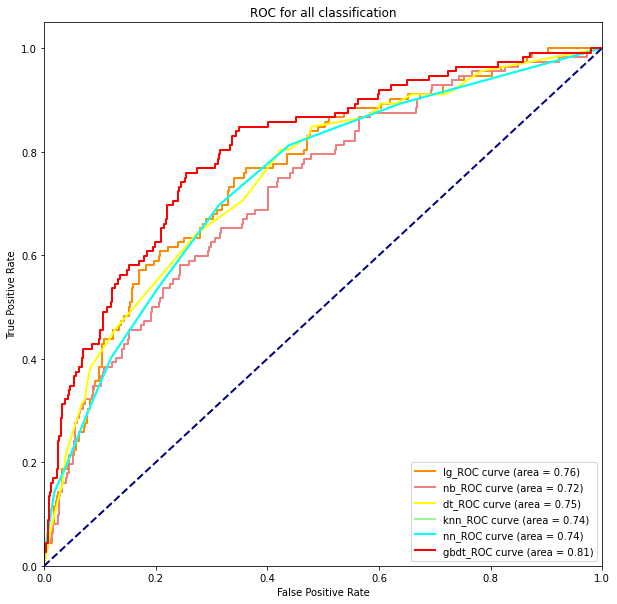

In [27]:
import matplotlib.pyplot  as plt

plt.figure(figsize=(10,10))
plt.plot(fpr_lg, tpr_lg, color='darkorange',
lw=2, label='lg_ROC curve (area = %0.2f)' % roc_auc_lg) 
plt.plot(fpr_mnb, tpr_mnb, color='lightcoral',
lw=2, label='nb_ROC curve (area = %0.2f)' % roc_auc_mnb)
plt.plot(fpr_dt, tpr_dt, color='yellow',
lw=2, label='dt_ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_knn, tpr_knn, color='palegreen',
lw=2, label='knn_ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_mlp, tpr_mlp, color='cyan',
lw=2, label='nn_ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_gbdt, tpr_gbdt, color='r',
lw=2, label='gbdt_ROC curve (area = %0.2f)' % a)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for all classification')
plt.legend(loc="lower right")
plt.show()